In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43.0,No,1045696.0,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32.0,No,581988.0,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26.0,No,1484315.0,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19.0,No,470454.0,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33.0,No,886787.0,No,0.0


In [3]:
# drop the only missing row in train
train = train.dropna(subset=['Vintage']).reset_index(drop=True)

In [4]:
# join train and test
df = pd.concat([train, test], ignore_index=True)
df.shape

(123999, 11)

In [5]:
train.isna().sum()

ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         2200
Avg_Account_Balance       0
Is_Active                 0
Is_Lead                   0
dtype: int64

In [6]:
test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

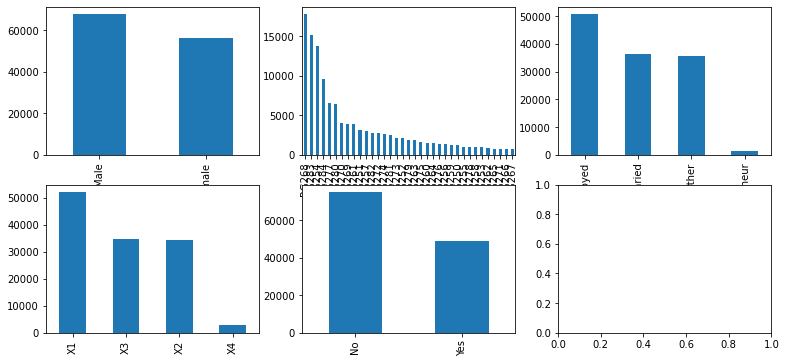

In [18]:
cat_cols = ["Gender", 'Region_Code', 'Occupation', 'Channel_Code', "Is_Active"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
# unpack all the axes subplots
axe = axes.ravel()
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', figsize=(13, 6), ax=axe[i]);

In [5]:
# df["Credit_Product"] = df.groupby("Credit_Product")["Avg_Account_Balance"].transform(lambda x: x.fillna(x.mean()))
# df["Credit_Product"] = df['Credit_Product'].fillna(df.groupby('Credit_Product')['Avg_Account_Balance'].transform('mean'))

df["Credit_Product"] = df['Credit_Product'].fillna(-999)

In [20]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [6]:
# function to calculate feature engineering by aggregating integer columns
def get_agg_by_cols(data, col, agg_list, agg_cols):
    """
    data : dataframe to calculate FE on
    col : list of columns to aggregate by (the object datatype)
    agg_list : a list of statistical measure e.g mean, median
    agg_cols : a list of numerical datatype columns
    """
    for cols in col:
        for i in agg_list:
            for j in agg_cols:
                data[cols+'_'+j+'_'+i] = data.groupby([cols])[j].transform(i)
    return data

In [7]:
# using dummy encoding
new_df = df.copy()

In [8]:
# using frequency Encoding
new_df['Region_Code_Enc'] = new_df['Region_Code'].map(new_df['Region_Code'].value_counts().to_dict())

In [9]:
cols_2_drop = ['ID', 'Is_Active']
cols = ['Credit_Product', 'Channel_Code']
agg_cols = ['Vintage', "Age", 'Avg_Account_Balance']
agg_list = ['mean', 'std']

In [10]:
# scale data
new_df['Age'] = (new_df['Age'] - new_df['Age'].mean()) / new_df['Age'].std()
new_df['Avg_Account_Balance'] = (new_df['Avg_Account_Balance'] - new_df['Avg_Account_Balance'].mean()) / new_df['Avg_Account_Balance'].std()
new_df['Vintage'] = (new_df['Vintage'] - new_df['Vintage'].mean()) / new_df['Vintage'].std()
new_df['Region_Code_Enc'] = (new_df['Region_Code_Enc'] - new_df['Region_Code_Enc'].mean()) / new_df['Region_Code_Enc'].std()

In [16]:
# new_df['Gender_Occupation'] = new_df['Gender'] + new_df['Occupation']
# new_df['Credit_Product_Channel_Code'] = new_df['Credit_Product'] + new_df['Channel_Code']
# new_df['Credit_Product_Region_Code'] = new_df['Credit_Product'] + new_df['Region_Code']
# new_df['Bin_Age'] = pd.cut(new_df['Age'], bins=[0, 30, 50, 90], labels=['Young', 'Adult', 'Old'])
# new_df['Bin_Vintage'] = pd.cut(df['Vintage'], labels=['Short', 'Long', 'V.Long',], bins=[0, 20, 60, 200])

In [11]:
new_df = get_agg_by_cols(new_df, cols, agg_list, agg_cols)


In [12]:
new_df = pd.get_dummies(data = new_df, columns=['Credit_Product'])
# cat_features = ['Channel_Code', 'Credit_Product', 'Occupation']

In [12]:
new_df = new_df.drop(cols_2_drop+['Gender', 'Region_Code', 'Occupation'], axis=1)

In [13]:
new_df.head()

,Age,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead,Region_Code_Enc,Credit_Product_Vintage_mean,Credit_Product_Age_mean,Credit_Product_Avg_Account_Balance_mean,Credit_Product_Vintage_std,Credit_Product_Age_std,Credit_Product_Avg_Account_Balance_std,Channel_Code_Vintage_mean,Channel_Code_Age_mean,Channel_Code_Avg_Account_Balance_mean,Channel_Code_Vintage_std,Channel_Code_Age_std,Channel_Code_Avg_Account_Balance_std
0,1.957679,X3,-0.119755,No,-0.102036,0.0,1.515427,-0.200592,-0.206986,-0.055039,0.890009,0.993783,0.987211,0.857785,0.721331,0.174503,1.016372,0.821145,1.089876
1,-0.933908,X1,-0.460440,No,-0.638697,0.0,-0.306966,-0.200592,-0.206986,-0.055039,0.890009,0.993783,0.987211,-0.667392,-0.774520,-0.109562,0.392036,0.652801,0.951375
2,0.814494,X3,-0.646268,No,0.405589,0.0,1.515427,-0.200592,-0.206986,-0.055039,0.890009,0.993783,0.987211,0.857785,0.721331,0.174503,1.016372,0.821145,1.089876
3,-0.664923,X1,-0.863067,No,-0.767778,0.0,-0.709079,-0.200592,-0.206986,-0.055039,0.890009,0.993783,0.987211,-0.667392,-0.774520,-0.109562,0.392036,0.652801,0.951375
4,-0.933908,X1,-0.429469,No,-0.285945,0.0,-0.914324,-0.200592,-0.206986,-0.055039,0.890009,0.993783,0.987211,-0.667392,-0.774520,-0.109562,0.392036,0.652801,0.951375


In [14]:
# separate train from test
train_df = new_df[:len(train)]
test_df = new_df[len(train):]

test_df = test_df.drop('Is_Lead', axis=1)

In [16]:
len(test_df)

105312

In [15]:
X = train_df.drop(['Is_Lead'], axis=1)
y = train_df['Is_Lead'].astype(int)

In [17]:
# modelling
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
kfold, scores, y_pred_totcb = StratifiedKFold(n_splits=5, shuffle=True, random_state=221), list(), []
for train_d, test_d in kfold.split(X, y):
    x_train, x_test = X.iloc[train_d], X.iloc[test_d]
    y_train, y_test = y.iloc[train_d], y.iloc[test_d]
    
    model = CatBoostClassifier(random_state=27,  n_estimators=3000, early_stopping_rounds=600, cat_features=['Credit_Product', 'Channel_Code'],
                               max_depth=7, verbose=500, learning_rate=0.04, eval_metric='AUC')
    model.fit(x_train, y_train, eval_set=(x_test, y_test))
    preds = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, preds)
    scores.append(score)
    print(score)
    test_pred = model.predict_proba(test_df)[:,1]
    y_pred_totcb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

0:	test: 0.8527061	best: 0.8527061 (0)	total: 79.1ms	remaining: 3m 57s
500:	test: 0.8531344	best: 0.8565585 (76)	total: 9.79s	remaining: 48.9s
Stopped by overfitting detector  (600 iterations wait)

bestTest = 0.8565585076
bestIteration = 76

Shrink model to first 77 iterations.
0.8565585076305429
0:	test: 0.8499671	best: 0.8499671 (0)	total: 22.2ms	remaining: 1m 6s
500:	test: 0.8568199	best: 0.8582959 (200)	total: 9.47s	remaining: 47.2s
Stopped by overfitting detector  (600 iterations wait)

bestTest = 0.8582958879
bestIteration = 200

Shrink model to first 201 iterations.
0.8582958879318091
0:	test: 0.8384827	best: 0.8384827 (0)	total: 14ms	remaining: 42s
500:	test: 0.8486236	best: 0.8520946 (60)	total: 9.68s	remaining: 48.3s
Stopped by overfitting detector  (600 iterations wait)

bestTest = 0.852094608
bestIteration = 60

Shrink model to first 61 iterations.
0.8520946079725448
0:	test: 0.8320464	best: 0.8320464 (0)	total: 13.9ms	remaining: 41.6s
500:	test: 0.8498371	best: 0.8503989 

In [21]:
import xgboost as xgb
kfold, scores, y_pred_totcb = StratifiedKFold(n_splits=5, shuffle=True, random_state=221), list(), []
for train, test in kfold.split(X, y):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = xgb.XGBClassifier(random_state=27,  n_estimators=2000, eval_metric='auc',
                               max_depth=5, learning_rate=0.0102)
    model.fit(x_train, y_train)
    preds = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, preds)
    scores.append(score)
    print(score)
    test_pred = model.predict_proba(test_df)[:,1]
    y_pred_totcb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

/home/abubakar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8643052028801077


/home/abubakar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.868360529073995


/home/abubakar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8593243230502337


/home/abubakar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8560206966234224


/home/abubakar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8578251841035063
Average:  0.861167187146253


In [22]:
sub = pd.read_csv('sample_submission_eyYijxG.csv')

In [23]:
sub['Is_Lead'] = np.mean(y_pred_totcb, axis=0)

In [24]:
sub.to_csv('cat_features_hyperparameterTV2.csv', index=False) #86.91, 86.96, 

In [25]:
sub.head()

,ID,Is_Lead
0,VBENBARO,0.075129
1,CCMEWNKY,0.872774
2,VK3KGA9M,0.050374
3,TT8RPZVC,0.015229
4,SHQZEYTZ,0.018337


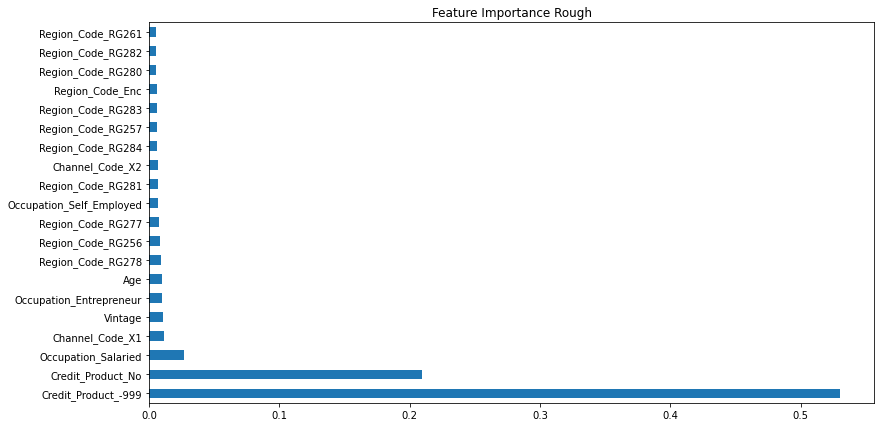

In [26]:
fea_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

fea_imp[:20].plot.barh(figsize=(13, 7), title="Feature Importance Rough");

In [39]:
features = fea_imp[:20].index

In [56]:
#import required packages
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import gc
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
#optional but advised
import warnings
warnings.filterwarnings('ignore')

#GLOBAL HYPEROPT PARAMETERS
NUM_EVALS = 1000 #number of hyperopt evaluation rounds
N_FOLDS = 5 #number of cross-validation folds on data in each evaluation round

#LIGHTGBM PARAMETERS
LGBM_MAX_LEAVES = 2**11 #maximum number of leaves per tree for LightGBM
LGBM_MAX_DEPTH = 25 #maximum tree depth for LightGBM
EVAL_METRIC_LGBM_REG = 'mae' #LightGBM regression metric. Note that 'rmse' is more commonly used 
EVAL_METRIC_LGBM_CLASS = 'auc'#LightGBM classification metric

#XGBOOST PARAMETERS
XGB_MAX_LEAVES = 2**12 #maximum number of leaves when using histogram splitting
XGB_MAX_DEPTH = 25 #maximum tree depth for XGBoost
EVAL_METRIC_XGB_REG = 'mae' #XGBoost regression metric
EVAL_METRIC_XGB_CLASS = 'auc' #XGBoost classification metric

#CATBOOST PARAMETERS
CB_MAX_DEPTH = 8 #maximum tree depth in CatBoost
OBJECTIVE_CB_REG = 'MAE' #CatBoost regression metric
OBJECTIVE_CB_CLASS = 'Logloss' #CatBoost classification metric

#OPTIONAL OUTPUT
BEST_SCORE = 0

def quick_hyperopt(data, labels, package='lgbm', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #LightGBM
    #==========
    
    if package=='lgbm':
        
        print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth',
                         'num_leaves',
                          'max_bin',
                         'min_data_in_leaf',
                         'min_data_in_bin']
        
        def objective(space_params):
            
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
            
            #extract nested conditional parameters
            if space_params['boosting']['boosting'] == 'goss':
                top_rate = space_params['boosting'].get('top_rate')
                other_rate = space_params['boosting'].get('other_rate')
                #0 <= top_rate + other_rate <= 1
                top_rate = max(top_rate, 0)
                top_rate = min(top_rate, 0.5)
                other_rate = max(other_rate, 0)
                other_rate = min(other_rate, 0.5)
                space_params['top_rate'] = top_rate
                space_params['other_rate'] = other_rate
            
            subsample = space_params['boosting'].get('subsample', 1.0)
            space_params['boosting'] = space_params['boosting']['boosting']
            space_params['subsample'] = subsample
            
            #for classification, set stratified=True and metrics=EVAL_METRIC_LGBM_CLASS
            cv_results = lgb.cv(space_params, train, nfold = N_FOLDS, stratified=True,
                                early_stopping_rounds=100, metrics=EVAL_METRIC_LGBM_CLASS, seed=42)
            
            # best_loss = cv_results['l1-mean'][-1] #'l2-mean' for rmse
            #for classification, comment out the line above and uncomment the line below:
            best_loss = 1 - cv_results['auc-mean'][-1]
            #if necessary, replace 'auc-mean' with '[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = lgb.Dataset(data, labels)
                
        #integer and string parameters, used with hp.choice()
        boosting_list = [{'boosting': 'gbdt',
                          'subsample': hp.uniform('subsample', 0.5, 1)},
                         {'boosting': 'goss',
                          'subsample': 1.0,
                         'top_rate': hp.uniform('top_rate', 0, 0.5),
                         'other_rate': hp.uniform('other_rate', 0, 0.5)}] #if including 'dart', make sure to set 'n_estimators'
#         metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        metric_list = ['auc'] #modify as required for other classification metrics
        objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
        objective_list_class = ['binary', 'cross_entropy']
        #for classification set objective_list = objective_list_class
        objective_list = objective_list_class

        space ={'boosting' : hp.choice('boosting', boosting_list),
                'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
                'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
                'max_bin': hp.quniform('max_bin', 32, 255, 1),
                'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
                'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
                'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
                'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
                'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'metric' : hp.choice('metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
                'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
            }
        
        #optional: activate GPU for LightGBM
        #follow compilation steps here:
        #https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm/
        #then uncomment lines below:
#         space['device'] = 'gpu'
#         space['gpu_platform_id'] = 0,
#         space['gpu_device_id'] =  0

        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
                
        #fmin() will return the index of values chosen from the lists/arrays in 'space'
        #to obtain actual values, index values are used to subset the original lists/arrays
        best['boosting'] = boosting_list[best['boosting']]['boosting']#nested dict, index twice
        best['metric'] = metric_list[best['metric']]
        best['objective'] = objective_list[best['objective']]
                
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_CLASS],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
           # best_loss = cv_results['test-mae-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE
            #for classification, comment out the line above and uncomment the line below:
            best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree', 'gblinear'] #if including 'dart', make sure to set 'n_estimators'
#         metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:linear', 'reg:gamma', 'reg:tweedie']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_class
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : -1
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #CatBoost
    #==========
    
    if package=='cb':
        
        print('Running {} rounds of CatBoost parameter optimisation:'.format(num_evals))
        
        #clear memory 
        gc.collect()
            
        integer_params = ['depth',
                          #'one_hot_max_size', #for categorical data
                          'min_data_in_leaf',
                          'max_bin']
        
        def objective(space_params):
                        
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract nested conditional parameters
            if space_params['bootstrap_type']['bootstrap_type'] == 'Bayesian':
                bagging_temp = space_params['bootstrap_type'].get('bagging_temperature')
                space_params['bagging_temperature'] = bagging_temp
                
            if space_params['grow_policy']['grow_policy'] == 'LossGuide':
                max_leaves = space_params['grow_policy'].get('max_leaves')
                space_params['max_leaves'] = int(max_leaves)
                
            space_params['bootstrap_type'] = space_params['bootstrap_type']['bootstrap_type']
            space_params['grow_policy'] = space_params['grow_policy']['grow_policy']
                           
            #random_strength cannot be < 0
            space_params['random_strength'] = max(space_params['random_strength'], 0)
            #fold_len_multiplier cannot be < 1
            space_params['fold_len_multiplier'] = max(space_params['fold_len_multiplier'], 1)
                       
            #for classification set stratified=True
            cv_results = cb.cv(train, space_params, fold_count=N_FOLDS, 
                             early_stopping_rounds=25, stratified=False, partition_random_seed=42)
           
            # best_loss = cv_results['test-MAE-mean'].iloc[-1] #'test-RMSE-mean' for RMSE
            #for classification, comment out the line above and uncomment the line below:
            best_loss = cv_results['test-Logloss-mean'].iloc[-1]
            #if necessary, replace 'test-Logloss-mean' with 'test-[your-preferred-metric]-mean'
            
            return{'loss':best_loss, 'status': STATUS_OK}
        
        train = cb.Pool(data, labels.astype('float32'))
        
        #integer and string parameters, used with hp.choice()
        bootstrap_type = [# {'bootstrap_type':'Poisson'}, 
                           {'bootstrap_type':'Bayesian',
                            'bagging_temperature' : hp.loguniform('bagging_temperature', np.log(1), np.log(50))},
                          {'bootstrap_type':'Bernoulli'}] 
        LEB = ['No', 'AnyImprovement', 'Armijo'] #remove 'Armijo' if not using GPU
        #score_function = ['Correlation', 'L2', 'NewtonCorrelation', 'NewtonL2']
        grow_policy = [{'grow_policy':'SymmetricTree'},
                       {'grow_policy':'Depthwise'},
                       {'grow_policy':'Lossguide',
                        'max_leaves': hp.quniform('max_leaves', 2, 32, 1)}]
        eval_metric_list_reg = ['MAE', 'RMSE', 'Poisson']
        eval_metric_list_class = ['Logloss', 'AUC', 'F1']
        #for classification change line below to 'eval_metric_list = eval_metric_list_class'
        eval_metric_list = eval_metric_list_class
                
        space ={'depth': hp.quniform('depth', 2, CB_MAX_DEPTH, 1),
                'max_bin' : 254, #if using CPU just set this to 254
                'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0, 5),
                'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 1, 50, 1),
                'random_strength' : hp.loguniform('random_strength', np.log(0.005), np.log(5)),
                #'one_hot_max_size' : hp.quniform('one_hot_max_size', 2, 16, 1), #uncomment if using categorical features
                'bootstrap_type' : hp.choice('bootstrap_type', bootstrap_type),
                'learning_rate' : hp.uniform('learning_rate', 0.05, 0.25),
                'eval_metric' : hp.choice('eval_metric', eval_metric_list),
                'objective' : OBJECTIVE_CB_CLASS,
                #'score_function' : hp.choice('score_function', score_function), #crashes kernel - reason unknown
                'leaf_estimation_backtracking' : hp.choice('leaf_estimation_backtracking', LEB),
                'grow_policy': hp.choice('grow_policy', grow_policy),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),# CPU only
                'fold_len_multiplier' : hp.loguniform('fold_len_multiplier', np.log(1.01), np.log(2.5)),
                'od_type' : 'Iter',
                'od_wait' : 25,
                'task_type' : 'CPU',
                'verbose' : 0
            }
        
        #optional: run CatBoost without GPU
        #uncomment line below
        #space['task_type'] = 'CPU'
            
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        #unpack nested dicts first
        best['bootstrap_type'] = bootstrap_type[best['bootstrap_type']]['bootstrap_type']
        best['grow_policy'] = grow_policy[best['grow_policy']]['grow_policy']
        best['eval_metric'] = eval_metric_list[best['eval_metric']]
        
        #best['score_function'] = score_function[best['score_function']] 
        best['leaf_estimation_method'] = LEM[best['leaf_estimation_method']] #CPU only
        best['leaf_estimation_backtracking'] = LEB[best['leaf_estimation_backtracking']]        
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    else:
        print('Package not recognised. Please use "lgbm" for LightGBM, "xgb" for XGBoost or "cb" for CatBoost.')

In [57]:
#obtain optimised parameter dictionary
lgbm_params = quick_hyperopt(X, y, 'cb', 2500)

Running 2500 rounds of CatBoost parameter optimisation:
Stopped by overfitting detector  (25 iterations wait)   

Stopped by overfitting detector  (25 iterations wait)                               

  0%|          | 2/2500 [00:37<14:07:57, 20.37s/trial, best loss: 0.3582297831347879]

job exception: catboost/private/libs/options/catboost_options.cpp:606: Backtracking type Armijo is supported only on GPU



  0%|          | 2/2500 [00:37<12:58:06, 18.69s/trial, best loss: 0.3582297831347879]


CatBoostError: catboost/private/libs/options/catboost_options.cpp:606: Backtracking type Armijo is supported only on GPU

In [32]:
a = pd.read_csv("first_rough_sub_xgb.csv")
b = pd.read_csv("first_rough_sub.csv")
c = pd.DataFrame()
c['ID']=a.ID
c['Is_Lead'] = a['Is_Lead']*0.7 + b['Is_Lead']*0.3
c.head()

,ID,Is_Lead
0,VBENBARO,0.076493
1,CCMEWNKY,0.839962
2,VK3KGA9M,0.047250
3,TT8RPZVC,0.022548
4,SHQZEYTZ,0.017155


In [33]:

c.to_csv('stacked_model.csv', index=False)

In [34]:
c.tail()

,ID,Is_Lead
105307,DBENJOYI,0.976971
105308,CWQ72DWS,0.606245
105309,HDESC8GU,0.070960
105310,2PW4SFCA,0.175824
105311,F2NOYPPZ,0.059443
